# ------------------------------- Classification of Faults ---------------------------------

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

In [7]:
df = pd.concat([df1,df2,df3,df4,df5])
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
1,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
3,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
4,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
460,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
461,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
462,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
463,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [8]:
# sns.set(rc={'figure.figsize':(10,6)})
# sns.scatterplot(x='Form Factor',y='Max',hue='Fault',data=df,palette='Dark2_r')

In [9]:
df['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

<AxesSubplot:>

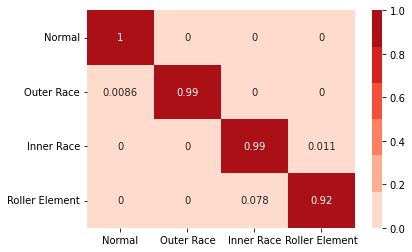

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
  
labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element']    
    
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred,labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element'], normalize ='true')
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap,xticklabels=labels, yticklabels=labels)

# Testing using this Random Forest Model

- At the end of the **TEST-1**, **inner race defect** occurred in **bearing 3** and **roller element** defect in **bearing 4**. 
- At the end of the **TEST-2**, **outer race failure** occurred in **bearing 1**.
- At the end of the **TEST-3**, **outer race failure** occurred in **bearing 3**.

In [13]:
Test_no=2
Bearing_no=1

test_2 = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')


In [14]:
y_pred_test_2 = rf_model.predict(test_2)
y_pred_test_2

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', '

In [15]:
test_2['Fault']=y_pred_test_2


In [16]:
test_2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,Normal
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,Normal
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,Normal
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,Normal
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,Outer Race
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,Outer Race
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,Outer Race
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,Normal


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9802631578947368


In [18]:
test_2.index = pd.to_datetime(test_2.index)

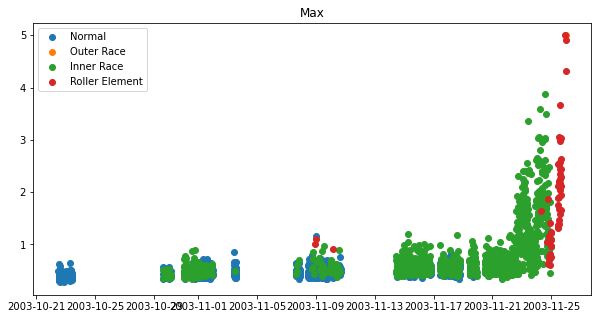

In [12]:
Test_no=1
Bearing_no=3


test_2 = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = rf_model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']

###############################################################

col='Max'                      # Change this value to any column name 
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

In [ ]:
# sns.set(rc={'figure.figsize':(10,6)})
# sns.scatterplot(x=test_2.index,y='Max',hue='Fault',data=test_2,palette='Dark2_r')

In [ ]:
#Xgboost and accuracy using k cross validation
import xgboost as xgb

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_clf.predict(X_test)
